<center>
<img src="../../img/ods_stickers.jpg">


### <center> Автор материала: Семеновых Владимир (@MdScntst)

# <center> Индивидуальный проект по анализу данных </center>
## <center> Предсказание вероятности отклика абонентов оператора сотовой связи на предложенную услугу

## 1. Описание набора данных и признаков

### Задача

Предсказание вероятности отклика абонентов на предложенную услугу (в течении 2 недель после рассылки).

Это реальные данные одной из телекоммуникационнах компаний, в целях соблюдения конфиденциальности данные были обезличены, колонки зашифрованы, значения линейно преобразованныб даты изменены.

Ценность данной задачи в повышении прибыли от пользования абонентами новой услугой, а также минимизации расходов на рассылку предложения. Ну и в рамках данного курса желающие могут ознакомиться со спецификой данных телекома.

### Сбор данных

О процессе сбора данных известно, что это агрегированные данные об использовании абонентом услуг связи за 2 месяца до рассылки оповещения о возможности подключить услугу. Рассылка происходила 10.10.2016.

Данные [тут](https://yadi.sk/d/gLS1XmJ_3Ucqec)

### Описание признаков

Имеются 22 столбца: Var1 - Var22, при чем:
 - Var22 - целевой бинарный (1 - услуга подключена, 0 - нет)
 - Var21 - категориальный признак, в нем зашифрован тарифный план
 - Var19 - временной признак, обозначающий время последнего звонка
 - Var20 - временной признак, обозначающий время последнего платежа
 - Var1 - Var18 - полностью анонимные признаки, которые содержат в себе информацию о пользовании услугами и списаниях. А также пропущенные значения в данных означают отсутствие пользованием услуг и/или списаний

## 2-3. Первичный и визуальный анализ данных

In [1]:
# Очен полезная либа для первичного анализа данных
import pandas_profiling
import pandas as pd
pd.set_option("display.max_columns", 22)

In [475]:
data = pd.read_csv('Data.csv', parse_dates=[18,19], dayfirst=True)

In [3]:
pandas_profiling.ProfileReport(data)

Number of variables,22
Number of observations,139448
Total Missing (%),34.3%
Total size in memory,23.4 MiB
Average record size in memory,176.0 B
Numeric,17
Categorical,0
Boolean,1
Date,2
Text (Unique),0
Rejected,2


### Статистическая информация о переменных со значениями таргета 0 и 1 соответственно

In [24]:
data[data['Var22']==0].describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var21,Var22
count,55320.000000,55320.000000,55320.000000,55320.000000,128407.000000,128407.000000,128407.000000,128407.000000,130908.000000,130908.000000,73421.000000,73421.000000,14750.000000,14750.000000,28240.000000,28240.000000,93011.000000,93011.000000,138463.000000,138463.0
mean,3.529266,8.442116,10.216499,62.647663,84.121847,200.963936,240.735402,113.428082,82.348726,204.396035,18.536032,18.974800,4.943661,4.817620,466.125383,21.492961,2.050134,264.798358,75.943277,0.0
std,6.577644,22.228686,24.873984,96.577548,118.527554,275.857297,318.549820,180.367579,97.340049,225.347602,52.717729,69.068431,16.375994,17.229266,1931.873628,185.949718,1.742304,590.485127,21.275718,0.0
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,0.0
25%,1.000000,1.120000,2.000000,12.100000,25.000000,46.980000,60.765000,25.600000,28.000000,58.070000,2.000000,1.200000,1.000000,1.200000,0.330000,0.000000,1.000000,100.000000,67.000000,0.0
50%,2.000000,3.770000,5.000000,29.800000,54.000000,115.760000,144.000000,72.500000,59.000000,136.770000,5.000000,3.600000,2.000000,1.500000,50.475000,0.000000,1.000000,200.000000,67.000000,0.0
75%,4.000000,9.650000,12.000000,75.762500,107.000000,249.930000,302.270000,150.600000,108.000000,273.430000,16.000000,12.000000,4.000000,3.600000,375.375000,2.775000,2.000000,300.000000,93.000000,0.0
max,475.000000,1447.800000,1682.190000,2770.200000,12172.000000,9499.080000,15994.530000,33924.690000,6152.000000,5658.420000,2722.000000,5468.980000,807.000000,968.400000,98899.500000,18803.120000,134.000000,70000.000000,160.000000,0.0


In [25]:
data[data['Var22']==1].describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var21,Var22
count,531.000000,531.000000,531.000000,531.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,733.000000,733.000000,179.000000,179.000000,420.000000,420.000000,873.000000,873.000000,985.000000,985.0
mean,3.879473,10.620188,12.623992,73.628041,121.387860,282.001019,340.157325,166.633457,114.265432,271.680257,24.356071,25.779632,4.575419,3.486872,836.040762,49.619000,2.727377,420.665109,76.101523,1.0
std,4.837410,16.115770,17.803551,169.110554,113.143579,278.003113,320.254739,224.093339,97.307371,236.375871,55.181817,70.720473,13.079646,9.260071,3046.205887,153.378189,2.282541,343.361363,18.708174,0.0
min,1.000000,0.020000,0.020000,0.000000,1.000000,0.120000,1.000000,0.000000,1.000000,0.770000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,15.000000,7.000000,1.0
25%,1.000000,1.610000,3.000000,13.100000,46.000000,93.715000,120.375000,36.000000,46.000000,100.512500,3.000000,0.000000,1.000000,0.900000,7.675000,0.000000,1.000000,200.000000,67.000000,1.0
50%,2.000000,5.500000,7.000000,36.600000,91.000000,201.860000,243.010000,105.825000,90.000000,213.845000,8.000000,4.500000,2.000000,1.500000,112.275000,0.000000,2.000000,340.000000,70.000000,1.0
75%,5.000000,13.025000,16.000000,83.250000,160.000000,387.507500,462.702500,218.625000,151.250000,365.932500,22.000000,15.600000,4.000000,3.600000,582.462500,6.627500,3.000000,540.000000,93.000000,1.0
max,38.000000,192.200000,213.000000,3214.200000,1171.000000,2070.140000,2207.080000,3214.200000,871.000000,2146.350000,787.000000,998.100000,143.000000,106.800000,51967.140000,1144.620000,19.000000,3244.000000,160.000000,1.0


Из таблиц видно, то имеются значимые различия в переменных у абонентов откликнувшихся на предложение и нет. Посмотрим на графическое представление данных

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

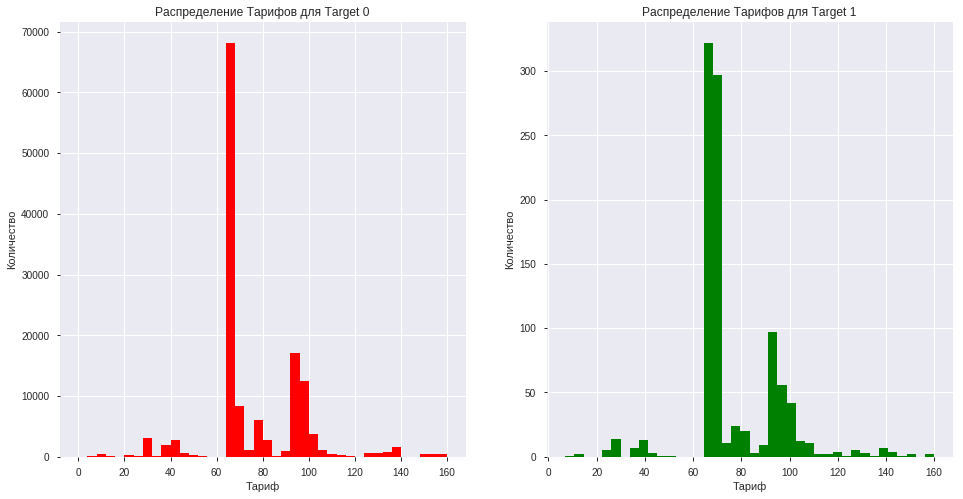

In [55]:
plt.rcParams['figure.figsize'] = 16,8
plt.subplot(121)
plt.hist(data['Var21'][data['Var22']==0], bins=40, color='red');
plt.title('Распределение Тарифов для Target 0')
plt.xlabel('Тариф')
plt.ylabel('Количество')
plt.subplot(122)
plt.hist(data['Var21'][data['Var22']==1], bins=40,  color='green');
plt.title('Распределение Тарифов для Target 1')
plt.xlabel('Тариф')
plt.ylabel('Количество');

Распределение тарифных планов доволно схоже, но отчетливо видны тарифные планы, абоненты которых более склонны к подключению услуги

#### Распределения величин и выбросов

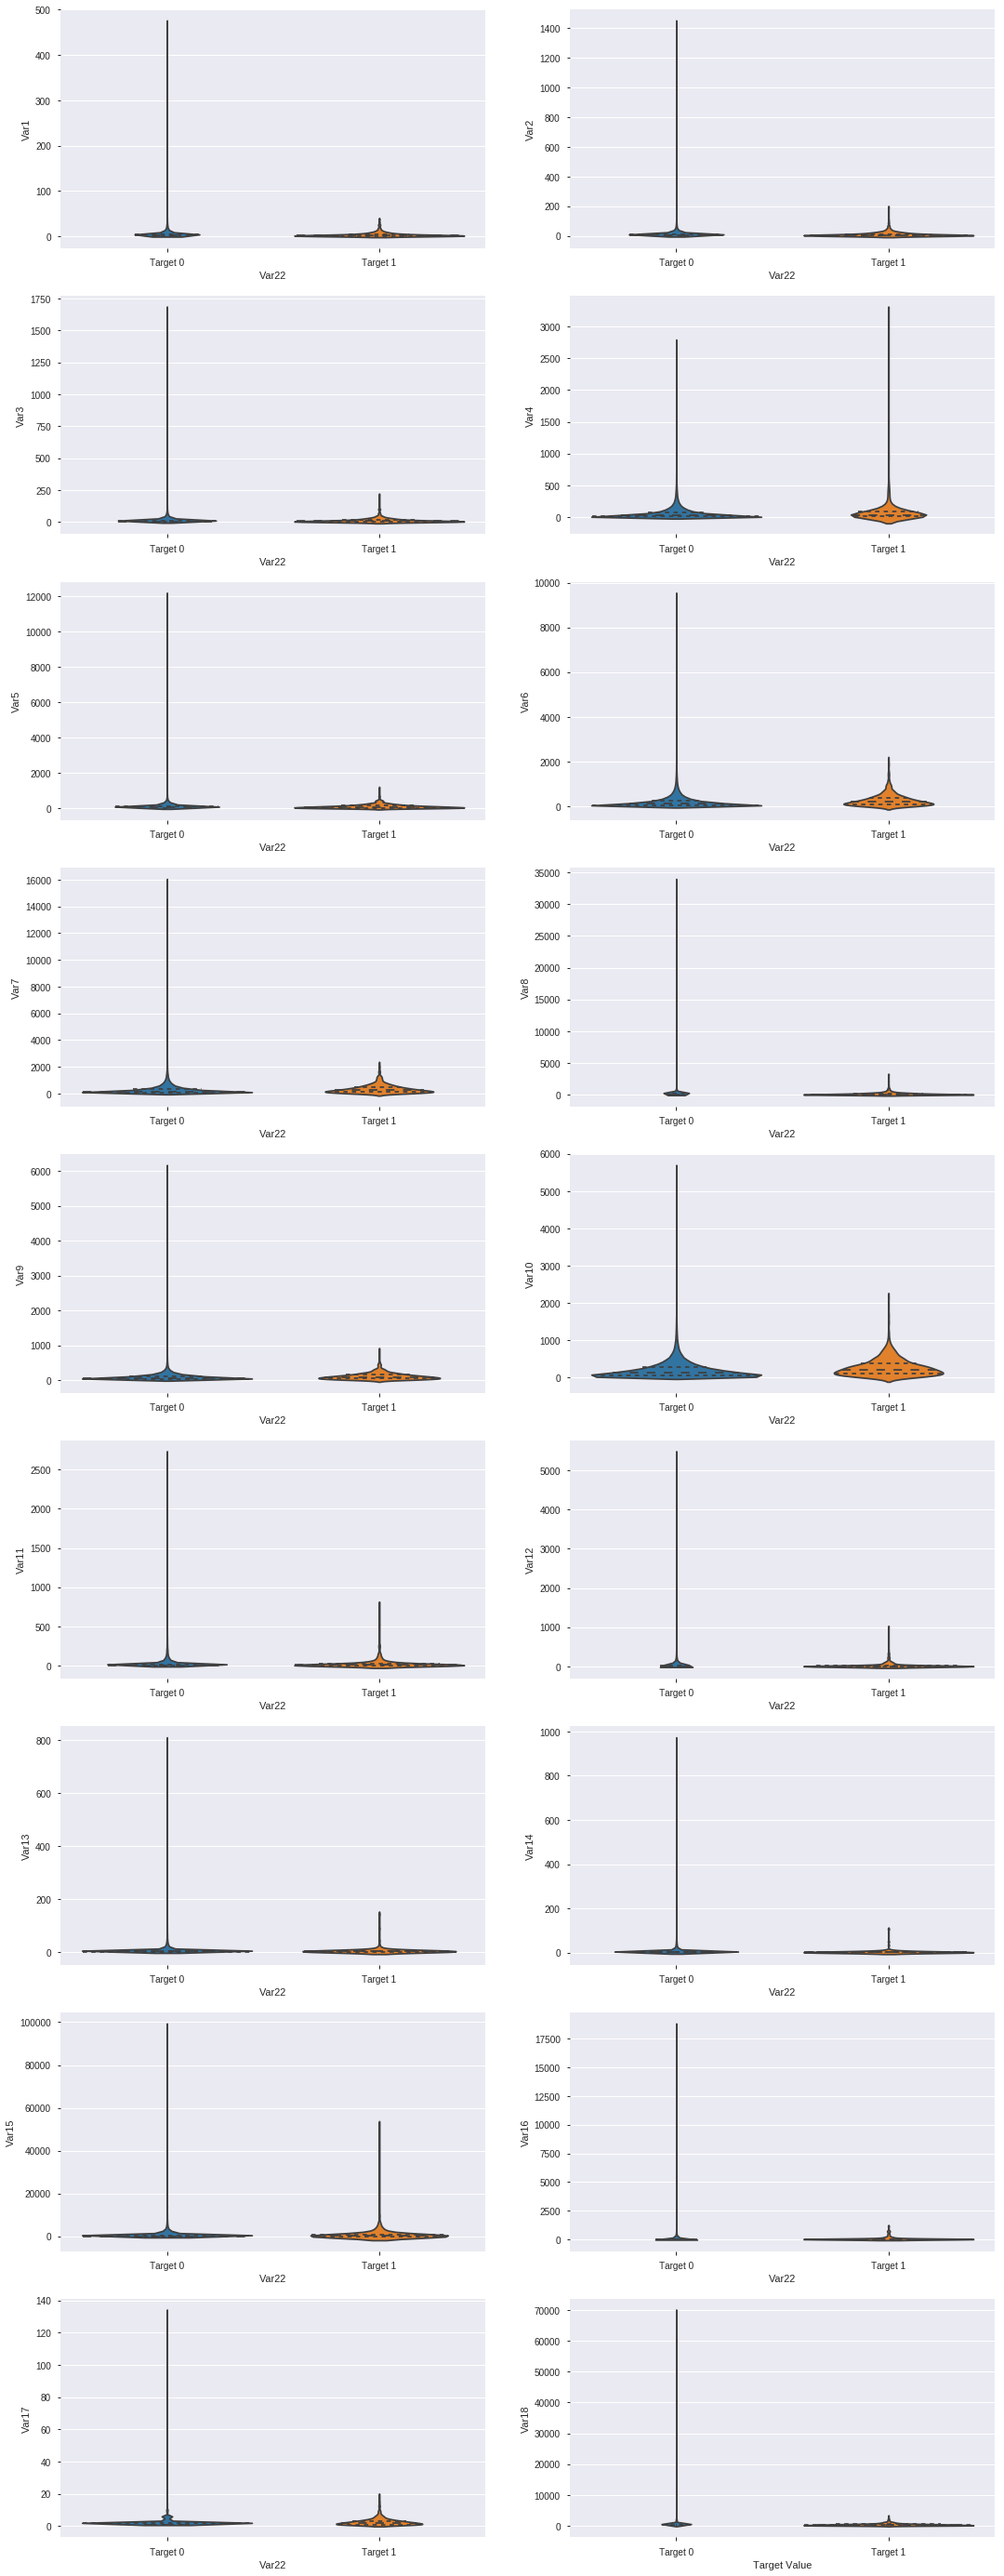

In [75]:
columns = ['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16', 'Var17',
       'Var18']

fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(18, 50))
for i, column in enumerate(columns): 
    sns.violinplot(y=data[column],x=data['Var22'].map({0:'Target 0', 1:'Target 1'}), data=data,split=True,inner="quart", ax=axes[i // 2][i % 2], label='Target 0')
    plt.xlabel('Target Value')
    ax1.set_title(column)

Тут видно, что распределения Var1, 8, 12, 14, 16, 18, относящихся к разным классам довольно хорошо различаются как по распределению, так и по характеру выбросов

Посмотрим на них подробнее

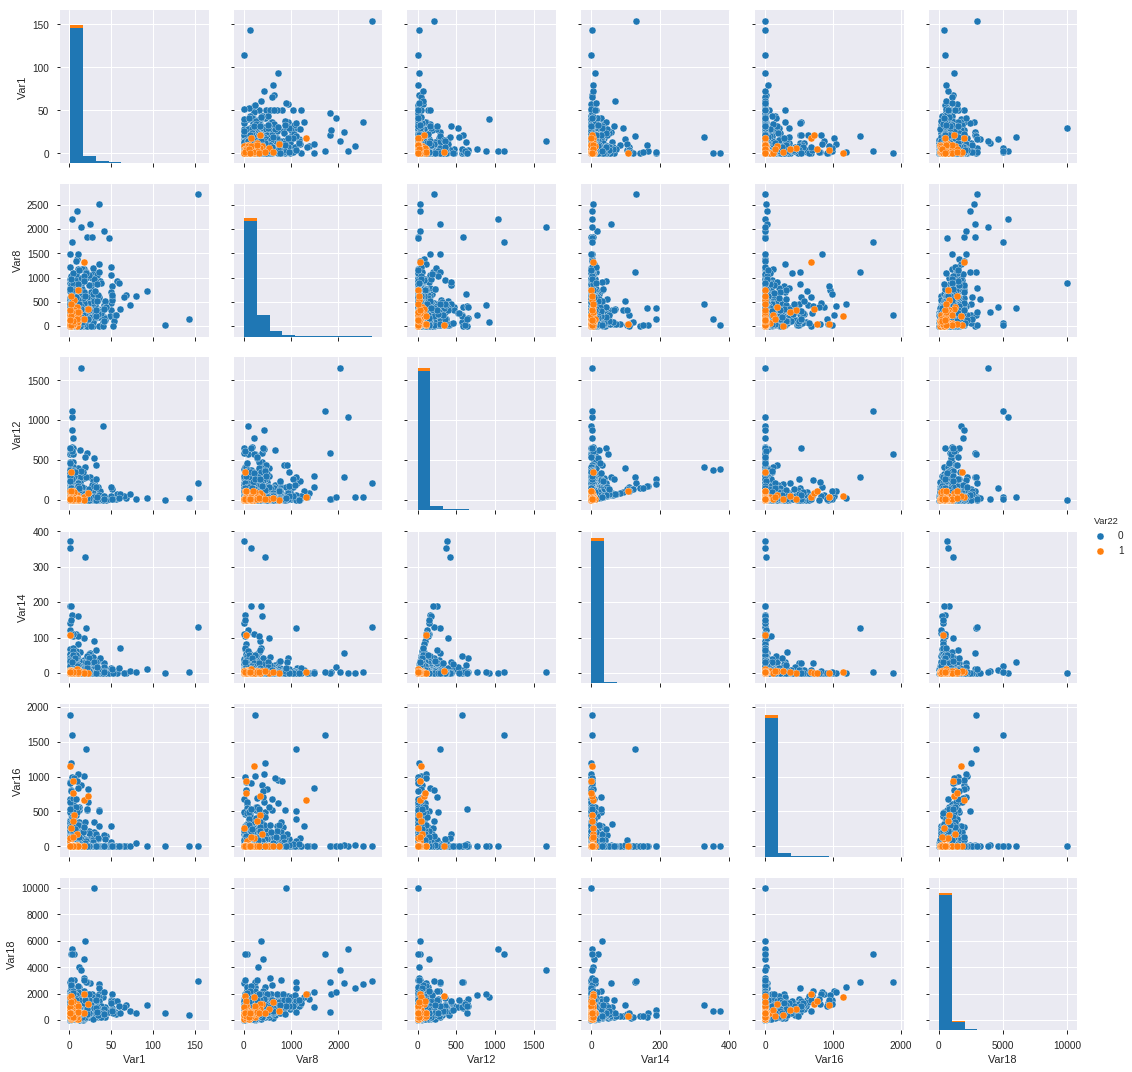

In [76]:
columns = ['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16', 'Var17',
       'Var18']
sns.pairplot(data=data.dropna(), hue='Var22', vars=['Var1', 'Var8', 'Var12', 'Var14', 'Var16', 'Var18']);

 Здесь можно отчетливо заметить, что в графиках зависимостей переменных Var12, Var14, Var18 от Var1; Var8 от Var12; Var12 от Var14 можно ярко выроженны зоны присутствия абонентов, откликнувшихся на предложение 

 #### Итого
 - Набор данных имеет 139448 записей и 22 переменных,

 - Var1 имеет 59.9% (83597) пропущенных значений, распределение сильно смещено вправо
 - Var2 имеет 59.9% (83597) пропущенных значений, распределение сильно смещено вправо
 - Var3 очень сильно коррелирует с Var2 (0.99627), и скорее всего представляет собой округленные значения Var2, поэтому эту переменную следует исключить
 - Var4 имеет 59.9% (83597) пропущенных значений, и 2.8% (3842) нулевых
 - Var5 имеет 7.2% (10069) пропущенных значений, распределение сильно смещено вправо
 - Var6 имеет 7.2% (10069) пропущенных значений
 - Var7 имеет 7.2% (10069) пропущенных значений, очень сильно коррелирует с Var6 (0.98806), его следует отбросить
 - Var8 имеет 7.2% (10069) пропущенных значений, и 4.4% (6159) нулевых и распределение сильно смещено вправо
 - Var9 имеет 5.4% (7568) пропущенных значений
 - Var10 имеет 5.4% (7568) пропущенных значений
 - Var11 имеет 46.8% (65294) пропущенных значений
 - Var12 имеет 46.8% (65294) пропущенных значений, и 12.4% (17353) нулевых и распределение сильно смещено вправо
 - Var13 имеет 89.3% (124519) пропущенных значений
 - Var14 имеет 89.3% (124519) пропущенных значений, и 1.4% (1942) нулевых и распределение сильно смещено вправо
 - Var15 имеет 79.4% (110788) пропущенных значений, и 1.8% (2574) нулевых и распределение сильно смещено вправо
 - Var16 имеет 79.4% (110788) пропущенных значений, и 12.2% (17071) нулевых и распределение сильно смещено вправо
 - Var17 имеет 32.7% (45564) пропущенных значений
 - Var18 имеет 32.7% (45564) пропущенных значений, распределение сильно смещено вправо
 - Var19 имеет 34.5% (48152) пропущенных значений
 - Var20 имеет 11% (15283) пропущенных значений
 - Var22 в целевой переменной положительный класс сотавляет около 0.7%
 
Var1, 8, 12, 14, 16, 18 - переменные хорошо характеризуют абонентов, относящихся к разным классам, но ввиду их анонимности, мы не можем охарактеризовать их значения.

### 4. Инсайты

 - Распределение всех переменных сильно смещено вправо, это обхясняется динамикой пользования услугами связи: большинство пользователей в среднем тратят **n** количество денег в месяц на связь, выговаривают **m**, минут и т.д., а как показывают скрипичные диаграммы нередки случаи отклонений от общего среднего. Так как предоставленные данные получены из автоматической биллинговой системы, это практически полностью исключает возможность неверной записи данных, следовательно выбросы с высокой долей вероятности можно отнести к экстремальным значениям переменных. 
 - Пропущенные значения, как указано в разделе, описания данных, являются фактом отсутствия пользования услугой и/или взимания средств за использование услуг связи, следовательно эти значения должны быть заменены на 0.
 - Из данных видно, что отсутствуют социально-демографические данные (возраст,пол...)
 - Сильно коррелируют между собой: Var1-4, Var5-7, Var9-10, Var13-14, скорее всего корреляция возникает между использованными услугами и выставленным счетом за 
 - 4400 строк идентичны
 - Переменные Var13-16 следует удалить из выборки ввиду подавляющего числа пропущенных значений
 - Анализируя скрипичные диаграммы и графики плотностей распределения, и статичтическую информацию можно сделать вывод, что классы хорошо разделимы, но ввиду большой разбалансировки целевой переменной, модели будут учиться предсказывать мажорный класс

### 5. Выбор метрики


В данных наблидается значительный дисбаланс классов. Самые распространённые метрики для бинарной классификации с дисбалансом данных -  roc-auc, precision, recall и а1-score, так как нас интересует именно вероятность отклика и, то есть границу принятия решения можно двигать и классификация бинарная - то наиболее полезной будет **roc-auc**

### 6. Выбор модели

Существует множество методов бинарной классификации, в данном случае я буду использовать два подхода - линейный и "деревянный":
 - LogisticRegression - логистическая регрессия является классической моделью для выявления зависимостей. В данном случае нужно применять one hot encoding для категориальных переменных и нормализовывать вещественные. К тому же т.к. в данных присутствуют выбросы и они являются экстемальными значениями, которые тоже являются полезной информацией ввиду своей природы (да и учитывая их количество), линейная модель будет давать большую ошибку, но будет являться отличным бэйзлайном.
 - XGBoost и RandomForestClassifier - для задачи с присутствием категориальных переменных, "разношерстных" вещественных, да еще и с большим числом пропусков и/или нулевых значений, данные методы самое то, т.к. основаны на деревьях решений!)

### 7. Предобработка данных

In [611]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split, learning_curve,validation_curve
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import roc_auc_score
import numpy as np
from scipy.stats import boxcox
import warnings
warnings.filterwarnings("ignore")

Так ка было решено использовать линейные модели и модели, основанные на решающих деревьях, данные бедут проходить разную предобработку

In [296]:
data_reg = data.copy()

In [297]:
data_tree = data.copy()

#### Сначала проведем предобработку данных для моделей основанных на решающих деревьях.

Выделим целевую переменную

In [298]:
y_tree = data_tree.Var22.values

Из данных удалим временные переменные и целевое поле

In [299]:
data_tree.drop(['Var19', 'Var20', 'Var22'], axis=1, inplace=True)

Заполним пропущенные значения нулями, т.к. эти значения показывают отсутствие пользованиея услугой

In [300]:
data_tree.fillna(0, inplace=True)

ПРоизведем разбивку данных на обучающую и валидационную с учетом баланса классов

In [301]:
X_tree_train, X_tree_val, y_tree_train, y_tree_val = train_test_split(data_tree.values, y_tree, test_size=0.3,
                                                                     random_state=42, shuffle=True, stratify=y_tree)

Тут собственно все!

#### Предобработка для линейной модели

Сначала повторим преобразования предыдущего шага

In [302]:
y_reg = data_reg.Var22.values

In [303]:
data_reg.drop(['Var19', 'Var20', 'Var22'], axis=1, inplace=True)

In [304]:
data_reg.fillna(0, inplace=True)

In [305]:
data_reg = pd.get_dummies(data_reg, prefix_sep='_', columns=['Var21'], sparse=False, drop_first=True)

Добавим OHE признаки

In [306]:
data_reg.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,...,Var21_150,Var21_151,Var21_152,Var21_153,Var21_154,Var21_155,Var21_156,Var21_157,Var21_158,Var21_159,Var21_160
0,0.0,0.00,0.0,0.0,61.0,58.30,88.00,93.00,93.0,122.32,3.0,...,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.78,1.0,13.9,75.0,187.82,188.03,42.16,182.0,575.67,0.0,...,0,0,0,0,0,0,0,0,0,0,0
2,2.0,16.83,18.0,101.7,66.0,156.93,194.00,365.70,94.0,426.98,0.0,...,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.00,0.0,0.0,77.0,226.78,268.03,144.00,103.0,304.34,13.0,...,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.00,0.0,0.0,20.0,48.70,61.00,0.80,41.0,63.47,1.0,...,0,0,0,0,0,0,0,0,0,0,0


In [307]:
X_reg_train, X_reg_val, y_reg_train, y_reg_val = train_test_split(data_reg.values, y_reg, test_size=0.3,
                                                                     random_state=42, shuffle=True, stratify=y_reg)

Все переменные были с сильным скосом распределения вправо, поэтому прогогарифмируем их (кроме OHE признаков)

In [308]:
X_reg_train[:, :18] = np.log1p(X_reg_train[:, :18])
X_reg_val[:, :18] = np.log1p(X_reg_val[:, :18])

Отмасштабируем данные

In [309]:
scaler = StandardScaler()
X_reg_train[:, :18] = scaler.fit_transform(X_reg_train[:, :18])

In [310]:
X_reg_val[:, :18] = scaler.transform(X_reg_val[:, :18])

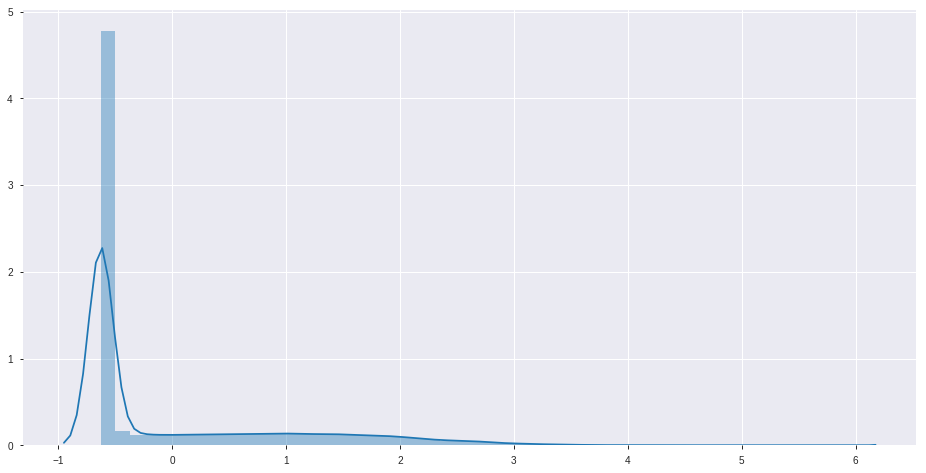

In [311]:
sns.distplot(X_reg_val[:, 1]);

Уже чуточку лучше

### 8. Кросс-валидация и настройка гиперпараметров модели

Добавим разбиение выборки с учетом балатса классов на 5 фолдов для кросс-валидации

In [312]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### 8.1. Сначала линейная модель

In [313]:
model = LogisticRegression(random_state=42)

Создадим словарь с основными параметрами LogisticRegression и найдем лучшие параметры

Тут:
 - **С** - обратное значение коэффициента регуляризации (силы регуляризации)
 - **class_weight** - используем ли веса для предикторов раззных классов в соответствии с их соотношением
 - **solver** - алгоритм оптимизации

In [331]:
param_grid = {
    'C': [0.01, 0.05, 0.1, 1, 5, 10, 20, 50, 100],
    'class_weight':[None, 'balanced'], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    
}

In [328]:
gs = GridSearchCV(model, param_grid, scoring='roc_auc', n_jobs=-1, cv=skf)

In [329]:
gs.fit(X_reg_train, y_reg_train);
print('Best parameters: ', gs.best_params_)
print('Best score: ', gs.best_score_)

Best parameters:  {'C': 0.01, 'class_weight': None, 'solver': 'saga'}
Best score:  0.7673922053267902


In [330]:
model = LogisticRegression(C= 0.01, class_weight= 'balanced', solver= 'liblinear')
model.fit(X_reg_train, y_reg_train)
print('ROC-AUC on validation set: ', roc_auc_score(y_reg_val, model.predict_proba(X_reg_val)[:,1]))

ROC-AUC on validation set:  0.7648729084292651


#### 8.2. Случайный лес

Основные параметры:

 - **n_estimators** - число деревьев
 - **criterion** - пригцип деления дерева на листья
 - **max_features** - максимальное число используемых признаков
 - **max_depth** - максимальная глубина дерева
 - **min_samples_leaf** - минимальное число объектов, допустимое в листовом узле

In [336]:
forest = RandomForestClassifier()

In [391]:
param_grid = {
    'max_depth': [10,  20, 30], 
    'n_estimators': [400,500], 
    'max_features': [1, 'auto'], 
    'criterion': ['gini', 'entropy'], 
    'min_samples_leaf': [0.1, 0.5, 1]
}

In [389]:
gs = GridSearchCV(forest, param_grid, scoring='roc_auc', n_jobs=-1, cv=skf, verbose=1)

In [390]:
gs.fit(X_tree_train, y_tree_train)
print('Best parameters: ', gs.best_params_)
print('Best score: ', gs.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   39.9s remaining:   26.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   54.4s finished


Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 400}
Best score:  0.7762050717425294


In [440]:
model = RandomForestClassifier(criterion='gini', max_depth=10, max_features=1, min_samples_leaf= 1, n_estimators= 400)
model.fit(X_tree_train, y_tree_train)
print('ROC-AUC on validation set: ', roc_auc_score(y_tree_val, model.predict_proba(X_tree_val)[:,1]))

ROC-AUC on validation set:  0.7494704179009891


#### 8.3. XGBoost

Основные параметры:

 - **max_depth** - максимальная глубина дерева
 - **n_estimators** - пчисло деревьев
 - **learning_rate** - learning_rate
 - **reg_lambda** - сила L2 регуляризации

In [408]:
forest = XGBClassifier(random_state=17, n_jobs=-1)

In [442]:
param_grid = {
    'max_depth': [3,4,5,6], 
    'n_estimators': [60,80, 100,200, 300], 
    'learning_rate':[0.01,0.05,0.1,0.5], 
    'reg_alpha': [0.1, 0.2,0.3]
}

In [426]:
gs = GridSearchCV(forest, param_grid, scoring='roc_auc', n_jobs=-1, cv=skf, verbose=1)

In [427]:
gs.fit(X_tree_train, y_tree_train)
print('Best parameters: ', gs.best_params_)
print('Best score: ', gs.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.4min finished


Best parameters:  {'max_depth': 3, 'n_estimators': 100}
Best score:  0.7736845361565322


In [441]:
model = XGBClassifier(max_depth=3,  n_estimators= 200,  learning_rate=0.1, reg_lambda=0.1)
model.fit(X_tree_train, y_tree_train)
print('ROC-AUC on validation set: ', roc_auc_score(y_tree_val, model.predict_proba(X_tree_val)[:,1]))

ROC-AUC on validation set:  0.7470473042917012


Результаты показывают, что модели основанные на деревьях решений показывают схожий результат на тесте, а логистическая регрессия опережайт оба метода по результатам

### 9. Создание новых признаков

В данной задаче должны были зайти фичи, связанные с подключаемой услугой: цена за минуту внутри сети, между операторами, междугородные звонки, стоимость эдиницы трафика и т.д. Но вследствие того, что данные зашифрованы мы не можем вычислить данные параметры. Остается работать только с датами: сколько прошло времени с последнего звонка, пополнения счета, факт наличия звонка за последние 2 месяа, факт наличия пополнения за последние 2 месяца.

In [478]:
#Факт совершения звонка за последние 2 мес
data['is_call'] = 1
data['is_call'][data['Var19'].isnull()] = 0

In [479]:
#Факт совершения платежа за последние 2 мес
data['is_topup'] = 1
data['is_topup'][data['Var20'].isnull()] = 0

In [486]:
#Заменаем пропуски в данных на минимальное значение даты
data['Var19'].fillna(data['Var19'].min(), inplace=True)
data['Var20'].fillna(data['Var20'].min(), inplace=True)

In [487]:
#Вводим дату рассылки
data['message_date'] = '10-10-2016'

In [488]:
data['message_date'] = pd.to_datetime(data['message_date'], format='%d-%m-%Y')

In [502]:
#Число дней с момента последнего звонка и пополнения до даты рассылки соответственно
data['calls_days_ago'] = (data['message_date'] -data['Var19']).dt.days
data['topup_days_ago'] = (data['message_date'] -data['Var20']).dt.days

In [503]:
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,...,Var17,Var18,Var19,Var20,Var21,Var22,is_call,is_topup,message_date,calls_days_ago,topup_days_ago
0,NaN,NaN,NaN,NaN,61.0,58.30,88.00,93.00,93.0,122.32,3.0,...,2.0,184.0,2016-08-26,2016-09-20,67,0,1,1,2016-10-10,45,20
1,1.0,0.78,1.0,13.9,75.0,187.82,188.03,42.16,182.0,575.67,NaN,...,1.0,95.0,2016-09-14,2016-09-09,99,0,1,1,2016-10-10,26,31
2,2.0,16.83,18.0,101.7,66.0,156.93,194.00,365.70,94.0,426.98,NaN,...,5.0,500.0,2016-10-03,2016-10-08,81,0,1,1,2016-10-10,7,2
3,NaN,NaN,NaN,NaN,77.0,226.78,268.03,144.00,103.0,304.34,13.0,...,1.0,100.0,2016-07-29,2016-10-03,67,0,0,1,2016-10-10,73,7
4,NaN,NaN,NaN,NaN,20.0,48.70,61.00,0.80,41.0,63.47,1.0,...,NaN,NaN,2016-07-29,2016-08-17,93,0,0,1,2016-10-10,73,54


#### Создание выборки для линейной модели

In [521]:
data_reg = data.copy()

In [522]:
y_reg = data_reg.Var22.values

In [523]:
data_reg.drop(['Var19', 'Var20', 'Var22', 'message_date'], axis=1, inplace=True)

In [524]:
data_reg.fillna(0, inplace=True)

In [525]:
data_reg = pd.get_dummies(data_reg, prefix_sep='_', columns=['Var21'], sparse=False, drop_first=True)

In [526]:
# C учетом новых переменных
X_reg_train, X_reg_val, y_reg_train, y_reg_val = train_test_split(data_reg.values, y_reg, test_size=0.3,
                                                                     random_state=42, shuffle=True, stratify=y_reg)

X_reg_train[:, :22] = np.log1p(X_reg_train[:, :22])
X_reg_val[:, :22] = np.log1p(X_reg_val[:, :22])

scaler = StandardScaler()
X_reg_train[:, :22] = scaler.fit_transform(X_reg_train[:, :22])

X_reg_val[:, :22] = scaler.transform(X_reg_val[:, :22])


In [603]:
model = LogisticRegression(random_state=42)

In [538]:
param_grid = {
    'C': [0.01, 0.05, 0.1, 1, 5, 10, 20, 50, 100],
    'class_weight':[None, 'balanced'], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    
}

In [536]:
gs = GridSearchCV(model, param_grid, scoring='roc_auc', n_jobs=-1, cv=skf)

In [537]:
gs.fit(X_reg_train, y_reg_train);
print('Best parameters: ', gs.best_params_)
print('Best score: ', gs.best_score_)

Best parameters:  {'C': 0.01, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best score:  0.7846237722062515


In [534]:
model = LogisticRegression(C= 0.01, class_weight= 'balanced', solver= 'liblinear')
model.fit(X_reg_train, y_reg_train)
print('ROC-AUC on validation set: ', roc_auc_score(y_reg_val, model.predict_proba(X_reg_val)[:,1]))

ROC-AUC on validation set:  0.7724334929792451


Результат чуть улучшился. Посмотрим на случайный лес

#### Создание выборки для деревьев

In [546]:
data_tree = data.copy()
y_tree = data_tree.Var22.values

In [547]:
data_tree.drop(['Var19', 'Var20', 'Var22','message_date'], axis=1, inplace=True)

In [548]:
data_tree.fillna(0, inplace=True)

In [549]:
X_tree_train, X_tree_val, y_tree_train, y_tree_val = train_test_split(data_tree.values, y_tree, test_size=0.3,
                                                                     random_state=42, shuffle=True, stratify=y_tree)

#### Испытываем случайный лес

In [572]:
forest = RandomForestClassifier(random_state=42)

In [564]:
param_grid = {
    'max_depth': [10, 20, 30], 
    'n_estimators': [400],#500], 
    'max_features': [1], #'auto'], 
    'criterion': ['gini'], #'entropy'], 
    'min_samples_leaf': [1],# 0.5, 1]
}

In [573]:
gs = GridSearchCV(forest, param_grid, scoring='roc_auc', n_jobs=-1, cv=skf, verbose=1)

In [574]:
gs.fit(X_tree_train, y_tree_train)
print('Best parameters: ', gs.best_params_)
print('Best score: ', gs.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.8min finished


Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 500}
Best score:  0.7710531602145987


In [580]:
model = RandomForestClassifier(criterion='entropy', max_depth=10, max_features=1, min_samples_leaf= 1, n_estimators= 300)
model.fit(X_tree_train, y_tree_train)
print('ROC-AUC on validation set: ', roc_auc_score(y_tree_val, model.predict_proba(X_tree_val)[:,1]))

ROC-AUC on validation set:  0.7461807301897337


В случае леса скор не увеличивается

#### Испытываем xgboost

In [581]:
forest = XGBClassifier(random_state=17, n_jobs=-1)

In [596]:
param_grid = {
    'max_depth': [4], 
    'n_estimators': [100], 
    'learning_rate':[0.01,0.05,0.1,0.5], 
    'reg_alpha': [0.1, 0.2,0.3]
}

In [597]:
gs = GridSearchCV(forest, param_grid, scoring='roc_auc', n_jobs=-1, cv=skf, verbose=1)

In [598]:
gs.fit(X_tree_train, y_tree_train)
print('Best parameters: ', gs.best_params_)
print('Best score: ', gs.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.3min finished


Best parameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0.1}
Best score:  0.7873203377771629


In [602]:
model = XGBClassifier(max_depth=4,  n_estimators= 100,  learning_rate=0.1, reg_lambda=0.1)
model.fit(X_tree_train, y_tree_train)
print('ROC-AUC on validation set: ', roc_auc_score(y_tree_val, model.predict_proba(X_tree_val)[:,1]))

ROC-AUC on validation set:  0.7645947182166157


В случае xgboost наблюдается увеличение качества модели, но все равно до логистической регресии не дотягивает

### 10. Кривые валидации и обучения

Кривые валидации буду строить на лучшей модели, которая показала себя на предыдущих этапах - **LogisticRegression**

In [604]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    '''
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    '''
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<Figure size 432x288 with 0 Axes>

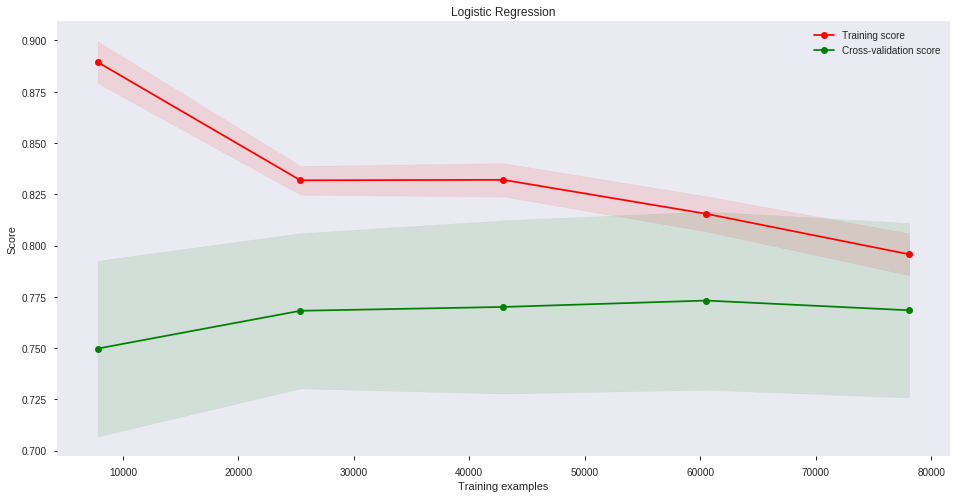

In [609]:
plt.figure(figsize=(6, 4))
plot_learning_curve(model, 'Logistic Regression', X_reg_train, y_reg_train, cv=5, n_jobs=-1);

График в целом адекватный, но видно, что имеестся стремление к недообучению. Использование фич, которые созданы на не зашифрованных данных могло бы поправить ситуацию

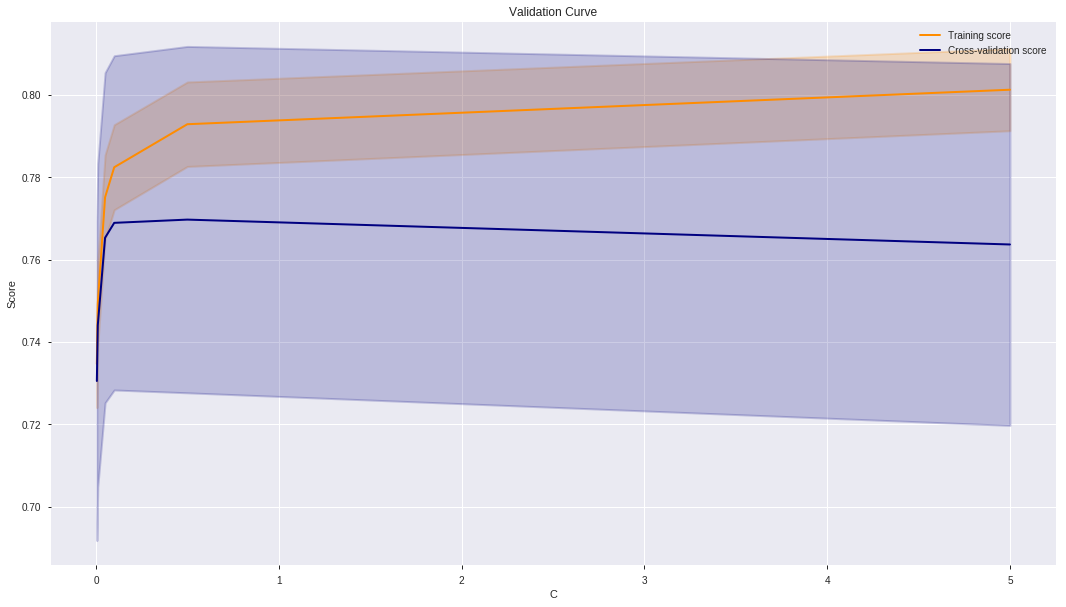

In [613]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure(figsize=(18, 10))
param_range=np.array([0.005, 0.01, 0.05, 0.1, 0.5, 5])
train_scores, test_scores = validation_curve(model, X_reg_train, y_reg_train, param_name="C",
                                             param_range=param_range, cv=5, scoring="roc_auc", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel("C")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

При увеличении значения C качество модели немного ухудшается.

### 11. Прогноз для тестовой или отложенной выборки

Тестовая выборка формировалась из исходных данных посредством случайного выбора 30% данных из оригинальной выборки с сохранением пропорций целевой переменной. Прогнозы на тестовой выборке представленны в разделах 8 и 9 данного проекта

### 12. Выводы

Построена и протестирована модель отклика на предложение о подключении услуги, которая показала довольно неплохой резултат в условиях сильной разбалансировки значений целевой переменной. Ценность модели заключается в возможности её использования для предсказания откликов на маркетинговые активности, выбирать пул колентов с наибольшей вероятностью отклика.


Пути улучшения результатов:
 - более точная настройка параметров модели
 - деанонимизация данных
 - использование нелинейных сочетаний признаков
 - небольшой бустинг числа минорного класса
